In [1]:
%matplotlib inline

# COMPSCI 369 Assignment 3 — Axton Pitt 2671457

## Problem 1: Bayesian Segmentation of Protein Secondary Structure

### 1a)

Diagram of the Hidden Markov Model & Emission Probability Table

![image1](1.png)

![image2](2.png)

### 1b) 

Simulation of state and symbol sequences of arbitary length from HMM

In [5]:
def sample(x,p):
    from numpy import cumsum, random

    # get cumulative sum of probabilities
    cumprob = cumsum(p)
    samp = ""
    # draw uniform value and find where it falls
    u = random.random()
    for j in range(0, len(x)):
        if u < cumprob[j] and samp == "":
            samp = x[j]

    return samp

def stateSort(index, previousState):
    equalPossibleStates = ["H", "S", "T"]

    ## probability arrays
    equal = [1 / 3, 1 / 3, 1 / 3]
    ## H (current), T, S
    HPossibleStates = ["H", "T", "S"]
    probH = [14 / 15, (1 / 15) * 0.7, (1 / 15) * 0.3]
    ## S (current), H, T
    SPossibleStates = ["S", "H", "T"]
    probS = [7 / 8, (1 / 8) * 0.4, (1 / 8) * 0.6]
    ## T (current), H, S
    TPossibleStates = ["T", "H", "S"]
    probT = [5 / 6, (1 / 6) * 0.5, (1 / 6) * 0.5]

    if index == 0:
        return sample(equalPossibleStates, equal)
    else:
        if previousState == "H":
            return sample(HPossibleStates, probH)
        elif previousState == "S":
            return sample(SPossibleStates, probS)
        elif previousState == "T":
            return sample(TPossibleStates, probT)

def symbolSort(currentState):
    possibleSymbols = ["B", "I", "N"]

    ## probability arrays: B, I, N
    probH = [0.30, 0.60, 0.10]
    probS = [0.55, 0.15, 0.30]
    probT = [0.10, 0.20, 0.70]

    if currentState == "H":
        return sample(possibleSymbols, probH)
    elif currentState == "S":
        return sample(possibleSymbols, probS)
    elif currentState == "T":
        return sample(possibleSymbols, probT)

def proteinHMMSimulate(sequenceLength):
    states = []
    symbols = []

    for i in range(0, sequenceLength):

        ## return states and symbols
        if i == 0:
            ## initial
            states.append(stateSort(i, "Z"))
            symbols.append(symbolSort(states[i]))
        else:
            ## proper
            states.append(stateSort(i, states[i-1]))
            symbols.append(symbolSort(states[i]))

    return states, symbols

print(proteinHMMSimulate(150))

(['T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'T', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'S', 'S', 'S', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'H'], ['B', 'I', 'B', 'I', 'I', 'N', 'I', 'I', 'I', 'B', 'I', 'I', 'I', 'B', 'I', 'I', 'B', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'N', 'I', 'I', 'I', 'B', 'B', 'I', 'B', 'N', 'B', 'N', 'I', 'B', 'I', 'B', 'B', 'B', 'B', 'B', 'B', 'I', 'B', 'B', '

### 1c) 

Calculating natural logarithm of the joint probability P(x, π).

In [7]:
def stateProbability(currentState, nextState):
    ## H (current), T, S
    HPossibleStates = ["H", "T", "S"]
    probH = [14 / 15, (1 / 15) * 0.7, (1 / 15) * 0.3]
    ## S (current), H, T
    SPossibleStates = ["S", "H", "T"]
    probS = [7 / 8, (1 / 8) * 0.4, (1 / 8) * 0.6]
    ## T (current), H, S
    TPossibleStates = ["T", "H", "S"]
    probT = [5 / 6, (1 / 6) * 0.5, (1 / 6) * 0.5]

    if currentState == "H":
        selectState = HPossibleStates.index(nextState)
        probability = probH[selectState]
        return probability

    elif currentState == "S":
        selectState = SPossibleStates.index(nextState)
        probability = probS[selectState]
        return probability

    elif currentState == "T":
        selectState = TPossibleStates.index(nextState)
        probability = probT[selectState]
        return probability

def symbolProbability(symbolString, stateString):

    ## Emission probabilities - B, I, N
    symbols = ["B", "I", "N"]
    probHSymbols = [0.30, 0.60, 0.10]
    probSSymbols = [0.55, 0.15, 0.30]
    probTSymbols = [0.10, 0.20, 0.70]

    if stateString == "H":
        index = symbols.index(symbolString)
        probabilityValue = probHSymbols[index]
        return probabilityValue

    elif stateString == "S":
        index = symbols.index(symbolString)
        probabilityValue = probSSymbols[index]
        return probabilityValue

    elif stateString == "T":
        index = symbols.index(symbolString)
        probabilityValue = probTSymbols[index]
        return probabilityValue

def naturalLogarithm(statesList, symbolsList):
    from numpy import log

    ## initial probability
    initialProb = 1/3

    ## take initial input state
    initialState = statesList[0]

    totalProbability = log(initialProb)

    for index in range(0, len(statesList)):
        # have a special index for the last state
        if index != len(statesList)-1:
            nextValue = log(symbolProbability(symbolsList[index], statesList[index])) + log(stateProbability(statesList[index], statesList[index + 1]))
            totalProbability = totalProbability + nextValue
        else:
            nextValue = log(symbolProbability(symbolsList[index], statesList[index]))
            totalProbability = totalProbability + nextValue

    return totalProbability

print("Sample Data:")
print(naturalLogarithm(["S","S","H","H","H","T","T","S","S","S","H","H","H","H","H","H","S","S","S","S","S","S"], ["B","I","N","B","N","I","N","B","N","I","N","B","I","N","B","I","I","N","B","B","N","B"]))
print("from HMM simulation:")
resultTuple = proteinHMMSimulate(150)
print(naturalLogarithm(resultTuple[0], resultTuple[1]))

Sample Data
-46.3877406945
from HMM simulation
-194.273089116


### 1d) 

The forward algorithm for HMMs to calculate the natural logrithm of the probability P(x)

In [9]:
def logStateProbability(currentState, nextState):
    from numpy import log
    ## H (current), T, S
    HPossibleStates = ["H", "T", "S"]
    probH = [14 / 15, (1 / 15) * 0.7, (1 / 15) * 0.3]
    ## S (current), H, T
    SPossibleStates = ["S", "H", "T"]
    probS = [7 / 8, (1 / 8) * 0.4, (1 / 8) * 0.6]
    ## T (current), H, S
    TPossibleStates = ["T", "H", "S"]
    probT = [5 / 6, (1 / 6) * 0.5, (1 / 6) * 0.5]

    if currentState == "H":
        selectState = HPossibleStates.index(nextState)
        probability = probH[selectState]
        return log(probability)

    elif currentState == "S":
        selectState = SPossibleStates.index(nextState)
        probability = probS[selectState]
        return log(probability)

    elif currentState == "T":
        selectState = TPossibleStates.index(nextState)
        probability = probT[selectState]
        return log(probability)

def logSymbolProbability(symbolString, stateString):
    from numpy import log
    ## Emission probabilities - B, I, N
    symbols = ["B", "I", "N"]
    probHSymbols = [0.30, 0.60, 0.10]
    probSSymbols = [0.55, 0.15, 0.30]
    probTSymbols = [0.10, 0.20, 0.70]

    if stateString == "H":
        index = symbols.index(symbolString)
        probabilityValue = probHSymbols[index]
        return log(probabilityValue)

    elif stateString == "S":
        index = symbols.index(symbolString)
        probabilityValue = probSSymbols[index]
        return log(probabilityValue)

    elif stateString == "T":
        index = symbols.index(symbolString)
        probabilityValue = probTSymbols[index]
        return log(probabilityValue)

def forwardNaturalProbability(symbolsList):
    from numpy import log, exp
    states = ["H", "S", "T"]
    symbols = ["B", "I", "N"]

    initialProb = 1/3
    runningSum = 0

    # previous cell values
    x = 0
    y = 0
    z = 0

    currentColumnSum = []

    for index in range(0, len(symbolsList)):

        symbol = symbols[symbols.index(symbolsList[index])]

        if index == 0:
            # get initial row
            ## for H
            x = logSymbolProbability(symbol, states[0]) + log(initialProb)
            ## for S
            y = logSymbolProbability(symbol, states[1]) + log(initialProb)
            ## for z
            z = logSymbolProbability(symbol, states[2]) + log(initialProb)

        else:
            # current row values
            a = logSymbolProbability(symbol, states[0])
            b = logSymbolProbability(symbol, states[1])
            c = logSymbolProbability(symbol, states[2])

            # new x value:
            # transition costs with current row
            # take x and times by hh transition probability
            xhh = x + logStateProbability(states[0], states[0])
            # take y and times by sh transition probability
            ysh = y + logStateProbability(states[1], states[0])
            # take z and times by th transition probability
            zth = z + logStateProbability(states[2], states[0])

            # new y value:
            # transition costs with current row
            # take x and times by hs transition probability
            xhs = x + logStateProbability(states[0], states[1])
            # take y and times by ss transition probability
            yss = y + logStateProbability(states[1], states[1])
            # take z and times by ts transition probability
            zts = z + logStateProbability(states[2], states[1])

            # new z value:
            # transition costs with current row
            # take x and times by ht transition probability
            xht = x + logStateProbability(states[0], states[2])
            # take y and times by st transition probability
            yst = y + logStateProbability(states[1], states[2])
            # take z and times by tt transition probability
            ztt = z + logStateProbability(states[2], states[2])

            ## get the log sums
            x = a + logSum([xhh, ysh, zth])
            y = b + logSum([xhs, yss, zts])
            z = c + logSum([xht, yst, ztt])

    result = logSum([x, y, z])

    return result

def logSum(x):
    from numpy import exp, log

    z = 0

    for i in x:
        z += exp(i - x[0])

    return x[0] + log(z)

print("sample data:")
print(forwardNaturalProbability(["B","I","N","B","N","I","N","B","N","I","N","B","I","N","B","I","I","N","B","B","N","B"]))
print("from HMM:")
print(forwardNaturalProbability(resultTuple[1]))

sample data:
-27.3105072553
from HMM:
-155.749831766


P(x) compared to P(x, π), results in a higher probability. The forward algorithm produces higher probabilites generally, compared to the joint probability. This is because it estimates the total probability, over one state path. Compared to P(x, π) there may be many possible state paths.

### 1e) 

The first step of Stochastic traceback can be preformed directly from the log matrix F, by starting with each row in the last column and using log properties to subtract instead of dividing to find log(prob).

### 2a)

Simulating Yule Trees

10


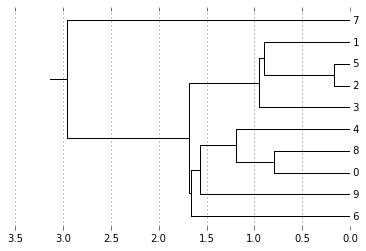

In [16]:
"""
tree69.py
A tree utility library for COMPSCI 369.
"""

# The MIT License (MIT)
#
# Copyright (c) 2016 Arman Bilge and Stuart Bradley
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

def compute_upgma_tree(matrix):

    import itertools as it

    n = len(matrix)
    nodes = [Node(str(i + 1)) for i in range(n)]
    for node in nodes:
        node.set_height(0)
    matrix = {nodes[i]: {nodes[j]: matrix[i][j] for j in range(n)} for i in range(n)}
    while len(matrix) > 1:
        a, b = min(it.combinations(matrix.keys(), 2), key=lambda xy: matrix[xy[0]][xy[1]])
        u = Node()
        u.add_child(a)
        u.add_child(b)
        u.set_height(matrix[a][b] / 2)
        uc = {c: (a.get_leaf_count() * matrix[a][c] + b.get_leaf_count() * matrix[b][c]) / (a.get_leaf_count() + b.get_leaf_count()) for c in matrix.keys() - set((a, b))}
        del matrix[a]
        del matrix[b]
        for k, v in matrix.items():
            del v[a]
            del v[b]
            v[u] = uc[k]
        matrix[u] = uc
    return Tree(u)

def plot_tree(tree):

    import itertools as it
    import numpy as np
    from matplotlib import pyplot as plt

    def compute_node_xy(node, counter=it.count()):
        node.x = node.get_height()
        if node.is_leaf():
            node.y = next(counter)
        else:
            children = node.get_children()
            for child in children:
                compute_node_xy(child, counter)
            node.y = np.mean([c.y for c in children])

    def plot_node(node):
        if node.is_leaf():
            plt.text(node.x, node.y, ' ' + node.get_label(), {'ha': 'left', 'va': 'center'})
        else:
            children = node.get_children()
            plt.plot([node.x] * 2, [min(c.y for c in children), max(c.y for c in children)], 'k')
            for child in children:
                plt.plot([node.x, child.x], [child.y] * 2, 'k')
                plot_node(child)

    root = tree.get_root()
    compute_node_xy(root)
    plt.plot([root.x, root.x + root.x / 16], [root.y] * 2, 'k')
    plot_node(root)
    lc = tree.get_leaf_count()
    plt.ylim(- lc / 16, 17 / 16 * lc - 1)
    axes = plt.gca()
    axes.invert_xaxis()
    axes.yaxis.set_visible(False)
    axes.set_frame_on(False)
    axes.grid()

"""
Python Tree Class
Stuart Bradley - 5931269
23-05-2014
"""
class Tree:

    def __init__(self, root=None):
        self.root = root

    def set_root(self, root):
        self.root = root

    def get_root(self):
        return self.root

    def get_leaves(self):
        return self.root.get_leaves()

    def get_leaf_count(self):
        return self.root.get_leaf_count()

    def get_newick(self):
        return self.root.get_newick() + ";"

    def __str__(self):
        return self.get_newick()

"""
Python Node Class
Stuart Bradley - 5931269
23-05-2014
"""
class Node:
    def __init__(self, label=None):
        self.parent = None
        self.children = []
        self.height = -1.0
        self.label = label
        self.sequence = None

    def get_parent(self):
        return self.parent

    def set_parent(self, parent):
        self.parent = parent

    def get_children(self):
        return self.children

    def add_child(self, child):
        self.children.append(child)
        child.set_parent(self)

    def remove_child(self, child):
        self.children.remove(child)

    def set_height(self, height):
        self.height = height

    def get_height(self):
        return self.height

    def is_root(self):
        return self.parent == None

    def is_leaf(self):
        return not self.children

    def get_sequence(self):
        return self.sequence

    def set_sequence(self, sequence):
        self.sequence = sequence

    def get_label(self):
        return self.label

    def set_label(self, label):
        self.label = label

    def get_leaves(self):
        leaf_list = []

        if (self.is_leaf()):
            leaf_list.append(self)
        else:
            for child in self.children:
                leaf_list.extend(child.get_leaves())

        return leaf_list

    def get_leaf_count(self):
        if self.is_leaf():
            return 1
        else:
            return sum(map(Node.get_leaf_count, self.children))

    def get_newick(self):
        sb = ""

        if (not self.is_leaf()):
            sb += "("
            for i in range(0, len(self.children)):
                if (i>0):
                    sb += ","
                sb += self.children[i].get_newick()
            sb += ")"

        if (self.label != None):
            sb += self.label

        branch_length = -1.0
        if (not self.is_root()):
            branch_length = self.parent.height - self.height
        else:
            branch_length = 0.0

        sb += ":" + str(branch_length)

        return sb
    
def randexp(lambd):
    import numpy
    return -numpy.log(numpy.random.random())/lambd

# simulating tree
def simulateTree(numberOfLeaves, branchingParameter):
    from numpy import exp, random
    import tree

    k = numberOfLeaves
    t = 0

    avaliableNodes = []

    ## avaliable nodes
    ## make n leaf nodes with time = 0 ; 1 to n
    for i in range(0, k):
        newNode = tree.Node()
        newNode.height = t
        newNode.label = str(i)
        avaliableNodes.append(newNode)

    print(len(avaliableNodes))

    while k > 1:
        ## generate time k
        exponent = k * branchingParameter
        tK = randexp(exponent)
        t = t + tK

        ## make a new node m
        m = tree.Node()
        # set height to t
        m.height = t

        ## choose two nodes
        randomIndex1 = random.randint(0, len(avaliableNodes))
        i = avaliableNodes.pop(randomIndex1)
        # print(len(avaliableNodes))
        randomIndex2 = random.randint(0, len(avaliableNodes))
        j = avaliableNodes.pop(randomIndex2)
        # print(len(avaliableNodes))

        m.add_child(i)
        m.add_child(j)

        # return tree if no more nodes
        if len(avaliableNodes) == 0:
            tree = tree.Tree()
            tree.root = m
            return tree
        else:
            # choose 2 nodes from avaliable nodes
            avaliableNodes.append(m)

        k = k - 1
        # print(k)

plot_tree(simulateTree(10, 0.5))